# PART 1

In [135]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
df = pd.read_csv("C:/Users/Sanjay/Downloads/dataset.csv")

In [3]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [4]:
df.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

In [5]:
# Checking for null values
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [6]:
# checking to see if the dataset has alphabectical value
alpha = df.select_dtypes(include=['object']).apply(lambda x: x.str.contains('[a-zA-Z]').any())
if any(alpha):
    print("Yes")
else:
    print("No")

Yes


In [7]:
# changing the alphabetical value to null value
df = df.replace('[a-zA-Z]','',regex=True)
df = df.apply(pd.to_numeric)

In [8]:
# checking for null values after the change
df.isna().sum()

f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [9]:
# dropping the null values
df = df.dropna()
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [10]:
# unique values
df.nunique()

f1         17
f2        136
f3         47
f4         51
f5        184
f6        248
f7        515
target      2
dtype: int64

In [11]:
# Description of the dataset after the change
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


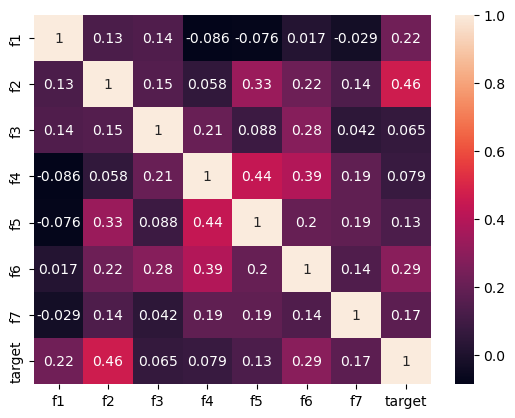

In [12]:
# Correlation plot
sns.heatmap(df.corr(), annot=True)
plt.show()

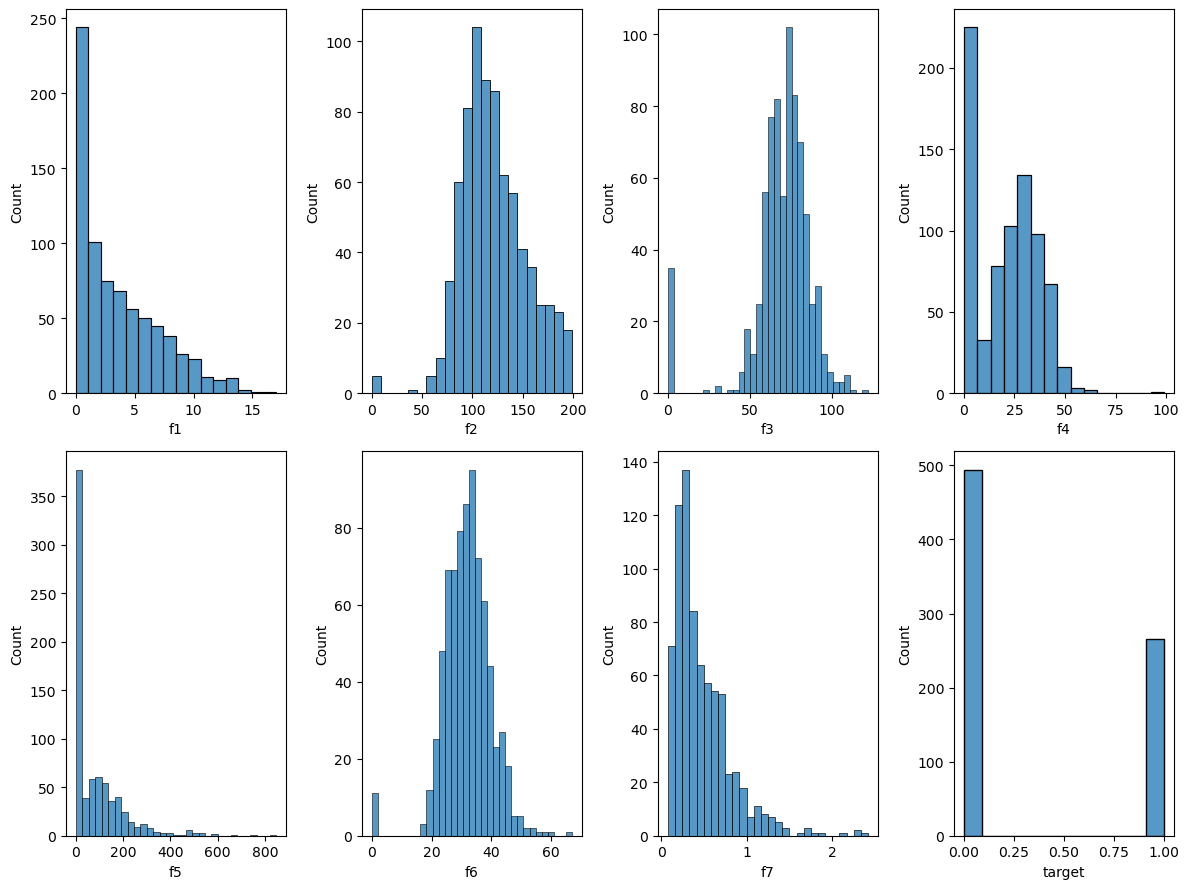

In [13]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
sns.histplot(df["f1"],ax=axes[0, 0])
sns.histplot(df["f2"], ax = axes[0,1])
sns.histplot(df["f3"], ax = axes[0,2])
sns.histplot(df["f4"], ax = axes[0,3])
sns.histplot(df["f5"], ax = axes[1,0])
sns.histplot(df["f6"], ax = axes[1,1])
sns.histplot(df["f7"], ax = axes[1,2])
sns.histplot(df["target"], ax = axes[1,3])
fig.tight_layout()
plt.show()

In [14]:
# Standard scaler
scaler = StandardScaler()
s = scaler.fit_transform(df.drop('target', axis=1))
df1 = pd.DataFrame(s, columns=df.columns[:-1])
df1['target'] = df['target']

In [155]:
# Splitting the dataset into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(df1.drop('target', axis=1), df1['target'], test_size=0.2, random_state=42)

In [156]:
x_train.shape

(608, 7)

In [157]:
x_test.shape

(152, 7)

In [158]:
y_train.shape

(608,)

In [159]:
y_test.shape

(152,)

In [159]:
# defining the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):

        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
    def forward(self, x):

        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train, num_epochs, batch_size, learning_rate):
        t_loss = []
        t_accuracy = []
        # loss function and optimizer
        loss_func = nn.CrossEntropyLoss()
        opti = optim.Adam(self.parameters(), lr=learning_rate)
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                opti.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                opti.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred
                

In [160]:
model = NeuralNetwork()

In [160]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int64)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int64)

In [161]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [162]:
# Fitting the model
model.fit(x_train,y_train,num_epochs=250,batch_size=128,learning_rate=0.0001)

In [163]:
# Predicting the accuracy
y_pred = model.predict(x_test)
accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
accuracy

0.756578947368421

The accuracy score is 0.75657

In [164]:
# saving the weights
torch.save(model,'SanjayRoshanravichandran_SanjayTarunJagannathan_assignment2_part1.h5')

# PART 2

In [1]:
# For the first hyperparameter tuning, Dropout hyperparameter is used
# Dropout will change but other hyperparameters is constant

In [22]:
class NeuralNetwork1(nn.Module):
    def __init__(self,d,learning_rate):

        super(NeuralNetwork1, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        # loss function
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [23]:
dropout = [0.2,0.3,0.4]
learning_rate = 0.0001
for d in dropout:
    model = NeuralNetwork1(d,learning_rate)
    model.fit(x_train,y_train,num_epochs=250,batch_size=128)
    # Predicting the accuracy
    y_pred = model.predict(x_test)
    accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
    print("Dropout: {}, Activation Function: Relu , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,accuracy))

Dropout: 0.2, Activation Function: Relu , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7303
Dropout: 0.3, Activation Function: Relu , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7500
Dropout: 0.4, Activation Function: Relu , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7500


In [25]:
# For the second hyperparameter tuning, Activation function is used
# Activation function will change but other hyperparameters is constant

In [64]:
class NeuralNetwork2(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(NeuralNetwork2, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        # loss function 
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [65]:
acti_fn = ["Relu","Sigmoid","Softmax"]
d = 0.2
learning_rate = 0.0001
for a in acti_fn:
    model = NeuralNetwork2(d,a,learning_rate)
    model.fit(x_train,y_train,num_epochs=250,batch_size=128)
    # Predicting the accuracy
    y_pred = model.predict(x_test)
    accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
    print("Activation Function: {} ,Dropout: {}, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(a,d,accuracy))

Activation Function: Relu ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7566
Activation Function: Sigmoid ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7368


C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\1744263015.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Activation Function: Softmax ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7697


In [28]:
# For the third hyperparameter tuning, Optimizer is used
# Optimizer will change but other hyperparameters is constant

In [29]:
class NeuralNetwork3(nn.Module):
    def __init__(self,d,o,learning_rate):

        super(NeuralNetwork3, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        if o == "Adam":
            self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
        elif o == "SGD":
            self.optimizer = optim.SGD(self.parameters(), lr =  learning_rate)
        elif o == "RMSprop":
            self.optimizer = optim.RMSprop(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        # loss function 
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [30]:
Optimizer = ["Adam","SGD","RMSprop"]
d = 0.2
learning_rate = 0.0001
for o in Optimizer:
    model = NeuralNetwork3(d,o,learning_rate)
    model.fit(x_train,y_train,num_epochs=250,batch_size=128)
    # Predicting the accuracy
    y_pred = model.predict(x_test)
    accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
    print("Optimizer: {},Activation Function: Relu ,Dropout: {}, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(o,d,accuracy))

Optimizer: Adam,Activation Function: Relu ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7434
Optimizer: SGD,Activation Function: Relu ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.6645
Optimizer: RMSprop,Activation Function: Relu ,Dropout: 0.2, Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7500


## After three hyperparameter tuning with 9 setups in total, the setup which has highest accuracy ,

### Activation Function: Softmax
### Dropout : 0.2
### Initializer : xavier_normal
### Optimizer: Adam
### Accuracy : 0.7697

## Taking this setup and making it as the base model

In [164]:
# Base model
class basemodel(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(basemodel, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train,x_test,y_test, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        te_loss = []
        te_accuracy = []
        # loss function
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            # Calculating the test accuracy and test_loss
            self.eval()
            with torch.no_grad():
                t_y_pred = self(x_test)
                test_loss = loss_func(t_y_pred, y_test).item()
                test_pred = torch.argmax(t_y_pred, dim=1)
                correct = (test_pred == y_test).sum().item()
                test_accuracy = correct / len(x_test)
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
            te_loss.append(test_loss)
            te_accuracy.append(test_accuracy)
        return t_accuracy,te_accuracy
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [165]:
a = "Softmax"
d = 0.2
learning_rate = 0.0001
base_model = basemodel(d,a,learning_rate)
b_train_accuracy,b_test_accuracy = base_model.fit(x_train,y_train,x_test,y_test,num_epochs=250,batch_size=128)
y_pred = base_model.predict(x_test)
base_accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
print("Dropout: {}, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,base_accuracy))


C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\2256099918.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Dropout: 0.2, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7632


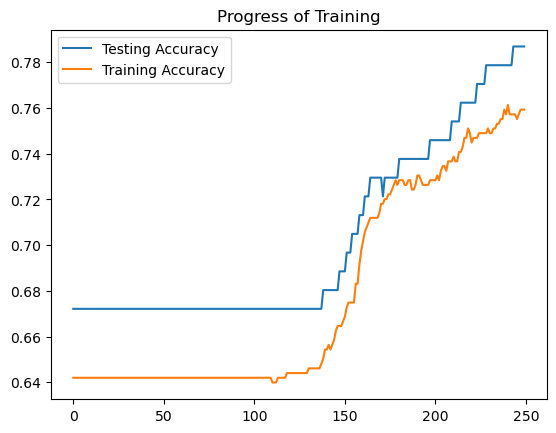

In [121]:
# Plotting train accuracy and test accuracy
plt.plot(b_test_accuracy,label="Testing Accuracy")
plt.plot(b_train_accuracy,label="Training Accuracy")
plt.title("Progress of Training")
plt.legend()
plt.show()

In [167]:
# Applying Early stopping to the model
class earlystopping(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(earlystopping, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    def fit(self, patience, x_train, y_train,x_test,y_test, num_epochs, batch_size):
        b_loss = float('inf')
        improvement = 0
        t_loss = []
        t_accuracy = []
        te_loss = []
        te_accuracy = []
        # loss function
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            # Calculating the test accuracy and test_loss
            self.eval()
            with torch.no_grad():
                t_y_pred = self(x_test)
                test_loss = loss_func(t_y_pred, y_test).item()
                test_pred = torch.argmax(t_y_pred, dim=1)
                correct = (test_pred == y_test).sum().item()
                test_accuracy = correct / len(x_test)
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
            te_loss.append(test_loss)
            te_accuracy.append(test_accuracy)
            if test_loss > b_loss:
                improvement += 1
            else:
                improvement = 0
                b_loss = test_loss
            if improvement >= patience:
                print("The model has not improved")
                break
        return t_accuracy,te_accuracy
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [170]:
a = "Softmax"
d = 0.2
learning_rate = 0.0001
patience = 2
early_model = earlystopping(d,a,learning_rate)
train_accuracy,test_accuracy = early_model.fit(patience,x_train,y_train,x_test,y_test,num_epochs=250,batch_size=128)
y_pred = early_model.predict(x_test)
early_accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
print("Dropout: {}, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,early_accuracy))

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\3239894971.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Dropout: 0.2, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7697


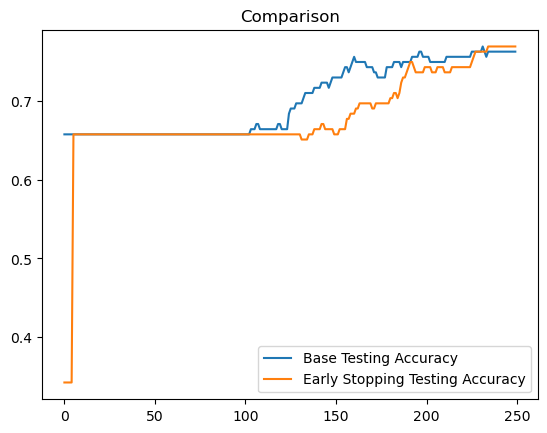

In [171]:
# Comparison of base model test accuracy and early stopping model test accuracy
plt.plot(b_test_accuracy,label="Base Testing Accuracy")
plt.plot(test_accuracy,label="Early Stopping Testing Accuracy")
plt.title("Comparison")
plt.legend()
plt.show()

In [172]:
## Gradient Clipping
class gradientclip(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(gradientclip, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    def fit(self,c_value, x_train, y_train,x_test,y_test, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        te_loss = []
        te_accuracy = []
        # loss function
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.parameters(), c_value)
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            # Calculating the test accuracy and test_loss
            self.eval()
            with torch.no_grad():
                t_y_pred = self(x_test)
                test_loss = loss_func(t_y_pred, y_test).item()
                test_pred = torch.argmax(t_y_pred, dim=1)
                correct = (test_pred == y_test).sum().item()
                test_accuracy = correct / len(x_test)
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
            te_loss.append(test_loss)
            te_accuracy.append(test_accuracy)
        return t_accuracy,te_accuracy
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [173]:
a = "Softmax"
d = 0.2
learning_rate = 0.0001
c_value = 1.0
gradient_model = gradientclip(d,a,learning_rate)
train_accuracy,test_accuracy = gradient_model.fit(c_value,x_train,y_train,x_test,y_test,num_epochs=250,batch_size=128)
y_pred = gradient_model.predict(x_test)
gradient_accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
print("Dropout: {}, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,gradient_accuracy))

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\2357923582.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Dropout: 0.2, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.7632


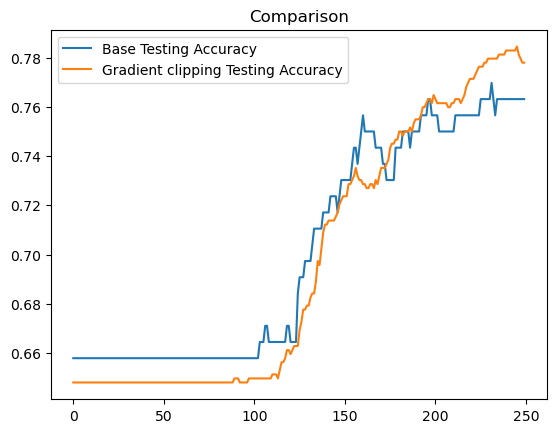

In [174]:
# Plotting train accuracy and test accuracy
plt.plot(b_test_accuracy,label="Base Testing Accuracy")
plt.plot(train_accuracy,label="Gradient clipping Testing Accuracy")
plt.title("Comparison")
plt.legend()
plt.show()

In [175]:
## Learning rate scheduler
class learningrate(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(learningrate, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    def fit(self, l_step, l_gamma, x_train, y_train,x_test,y_test, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        te_loss = []
        te_accuracy = []
        # loss function 
        loss_func = nn.CrossEntropyLoss()
        schedule = optim.lr_scheduler.StepLR(self.optimizer, step_size=l_step, gamma=l_gamma)
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            # Calculating the test accuracy and test_loss
            self.eval()
            with torch.no_grad():
                t_y_pred = self(x_test)
                test_loss = loss_func(t_y_pred, y_test).item()
                test_pred = torch.argmax(t_y_pred, dim=1)
                correct = (test_pred == y_test).sum().item()
                test_accuracy = correct / len(x_test)
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
            te_loss.append(test_loss)
            te_accuracy.append(test_accuracy)
            schedule.step()
        return t_accuracy,te_accuracy
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [176]:
a = "Softmax"
d = 0.2
learning_rate = 0.0001
l_step = 20
l_gamma = 0.1
learning_model = learningrate(d,a,learning_rate)
train_accuracy,test_accuracy = learning_model.fit(l_step,l_gamma,x_train,y_train,x_test,y_test,num_epochs=250,batch_size=128)
y_pred = learning_model.predict(x_test)
learning_accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
print("Dropout: {}, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,learning_accuracy))

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\1600764677.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Dropout: 0.2, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.6579


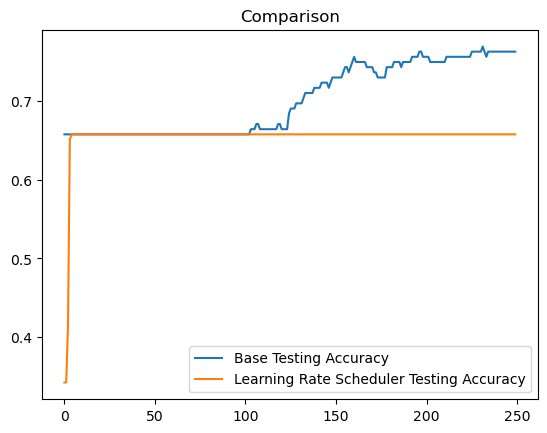

In [177]:
# Plotting train accuracy and test accuracy
plt.plot(b_test_accuracy,label="Base Testing Accuracy")
plt.plot(test_accuracy,label="Learning Rate Scheduler Testing Accuracy")
plt.title("Comparison")
plt.legend()
plt.show()

In [179]:
## Batch normalization
class batchnorm(nn.Module):
    def __init__(self,d,a,learning_rate):

        super(batchnorm, self).__init__()
        self.fc1 = nn.Linear(7, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(d)
        if a == "Relu":
            self.activationfunction = nn.ReLU()
        elif a == "Sigmoid":
            self.activationfunction = nn.Sigmoid()
        elif a == "Softmax":
            self.activationfunction = nn.Softmax()
        self.fc2 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr =  learning_rate)
    def forward(self, x):

        out = self.fc1(x)
        out = self.bn1(out)
        out = self.dropout(out)
        out = self.activationfunction(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.fc3(out)
        return out
    def fit(self, x_train, y_train,x_test,y_test, num_epochs, batch_size):
        t_loss = []
        t_accuracy = []
        te_loss = []
        te_accuracy = []
        # loss function
        loss_func = nn.CrossEntropyLoss()
        for e in range(num_epochs):
            a = torch.randperm(x_train.shape[0])
            x_train = x_train[a]
            y_train = y_train[a]
            e_loss = 0.0
            e_accuracy = 0.0
            for i in range(0,x_train.shape[0],batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = loss_func(y_pred,y_batch)
                loss.backward()
                self.optimizer.step()
                e_loss+=loss.item( )* x_batch.size(0)
                _,l_pred = torch.max(y_pred.data,1)
                e_accuracy += (l_pred == y_batch).sum().item()
            # Calculating the test accuracy and test_loss
            self.eval()
            with torch.no_grad():
                t_y_pred = self(x_test)
                test_loss = loss_func(t_y_pred, y_test).item()
                test_pred = torch.argmax(t_y_pred, dim=1)
                correct = (test_pred == y_test).sum().item()
                test_accuracy = correct / len(x_test)
            e_loss /= x_train.shape[0]
            e_accuracy /= x_train.shape[0]
            t_loss.append(e_loss)
            t_accuracy.append(e_accuracy)
            te_loss.append(test_loss)
            te_accuracy.append(test_accuracy)
        return t_accuracy,te_accuracy
    def predict(self,x):
        self.eval()
        _,l_pred = torch.max(self(x), dim=1)
        return l_pred

In [180]:
a = "Softmax"
d = 0.2
learning_rate = 0.0001
batch_model = basemodel(d,a,learning_rate)
train_accuracy,b_test_accuracy = base_model.fit(x_train,y_train,x_test,y_test,num_epochs=250,batch_size=128)
y_pred = batch_model.predict(x_test)
batch_accuracy = ((y_pred == y_test).sum().item()) / (y_test.shape[0])
print("Dropout: {}, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: {:.4f}".format(d,batch_accuracy))

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_1528\2256099918.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.activationfunction(out)


Dropout: 0.2, Activation Function: Softmax , Initializer: xavier_normal,Optimizer: Adam, Test Accuracy: 0.6579


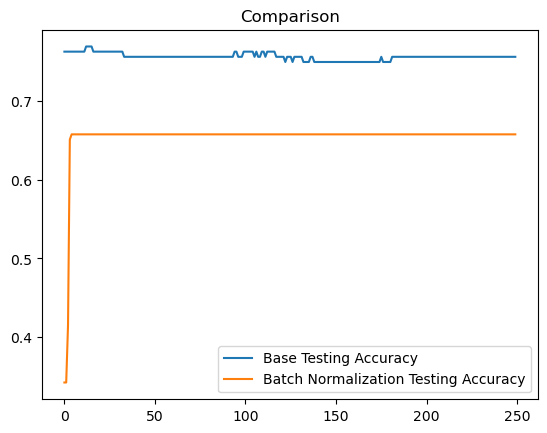

In [181]:
# Plotting train accuracy and test accuracy
plt.plot(b_test_accuracy,label="Base Testing Accuracy")
plt.plot(test_accuracy,label="Batch Normalization Testing Accuracy")
plt.title("Comparison")
plt.legend()
plt.show()

In [182]:
# Accuracy for different method
print("Base Model: {}".format(base_accuracy))
print("Early Stopping Model: {}".format(early_accuracy))
print("Gradient Clipping Model: {}".format(gradient_accuracy))
print("Learning Scheduler Rate Model: {}".format(learning_accuracy))
print("Batch Normalization Model: {}".format(batch_accuracy))

Base Model: 0.7631578947368421
Early Stopping Model: 0.7697368421052632
Gradient Clipping Model: 0.7631578947368421
Learning Scheduler Rate Model: 0.6578947368421053
Batch Normalization Model: 0.6578947368421053


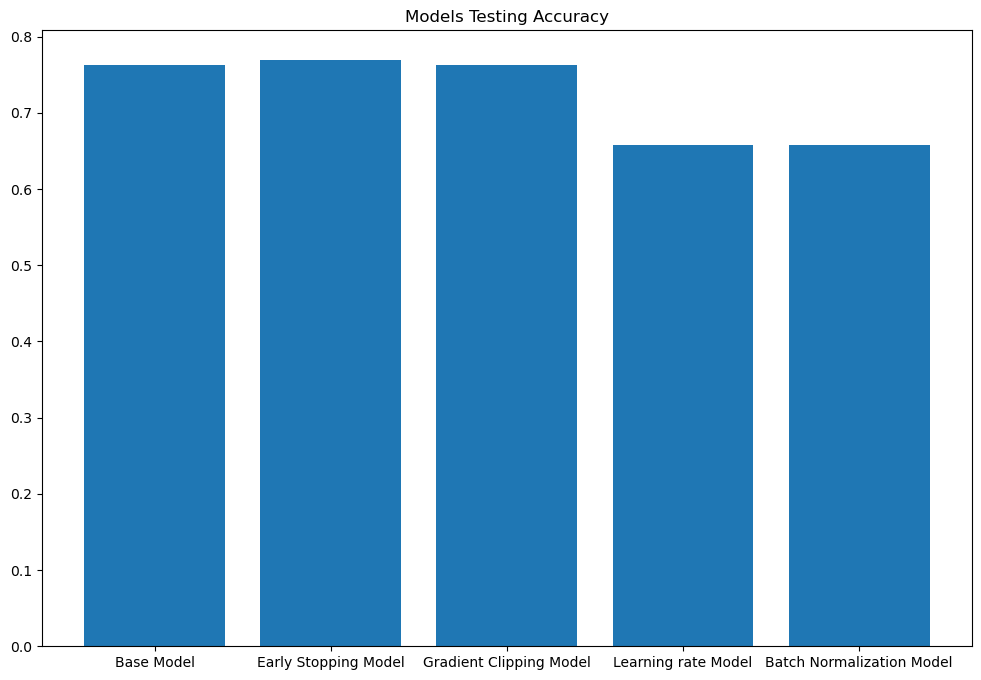

In [184]:
# Plotting the accuracy for each model
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(['Base Model','Early Stopping Model','Gradient Clipping Model','Learning rate Model','Batch Normalization Model'],[base_accuracy,early_accuracy,gradient_accuracy,learning_accuracy,batch_accuracy])
ax.set_title("Models Testing Accuracy")
plt.show()

Early Stopping Model has the highest accuracy

In [185]:
# saving the weights
torch.save(early_model,'SanjayRoshanravichandran_SanjayTarunJagannathan_assignment2_part2.h5')